<a href="https://colab.research.google.com/github/notnsas/cautious-eureka/blob/version-1/aplikasi_ds/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Manipulasi data
import pandas as pd
import numpy as np

# Kaggle Hub buat import dataset
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]


# Set the path to the file you'd like to load
file_path = "DATA RUMAH.xlsx"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "wisnuanggara/daftar-harga-rumah",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-5-4077165420.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [6]:
# Liat data teratas
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [9]:
# Ringkasan statistika
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NO,1010.0,5.055000e+02,2.917062e+02,1.0,2.532500e+02,5.055000e+02,7.577500e+02,1.010000e+03
HARGA,1010.0,7.628987e+09,7.340946e+09,430000000.0,3.262500e+09,5.000000e+09,9.000000e+09,6.500000e+10
LB,1010.0,2.765396e+02,1.778646e+02,40.0,1.500000e+02,2.165000e+02,3.500000e+02,1.126000e+03
LT,1010.0,2.374327e+02,1.799576e+02,25.0,1.300000e+02,1.650000e+02,2.900000e+02,1.400000e+03
KT,1010.0,4.668317e+00,1.572776e+00,2.0,4.000000e+00,4.000000e+00,5.000000e+00,1.000000e+01
KM,1010.0,3.607921e+00,1.420066e+00,1.0,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+01
GRS,1010.0,1.920792e+00,1.510998e+00,0.0,1.000000e+00,2.000000e+00,2.000000e+00,1.000000e+01


In [10]:
# Memeriksa data duplikat
print(f'Jumlah data duplikat :  {df.duplicated().sum()}')
print(f'Jumlah baris sebelum menghapus duplikat: {len(df)}')

# Menghapus data dupliksa
df.drop_duplicates(inplace=True)

# Memverifikasi setelah penanganan
print(f'Jumlah baris setelah menghapus duplikat : {len(df)}')

Jumlah data duplikat :  0
Jumlah baris sebelum menghapus duplikat: 1010
Jumlah baris setelah menghapus duplikat : 1010


In [11]:
# Memeriksa nilai yang hilang (missing values)
df.isna().sum()

,0
NO,0
NAMA RUMAH,0
HARGA,0
LB,0
LT,0
KT,0
KM,0
GRS,0


Kolom Numerik Berupa :  Index(['NO', 'HARGA', 'LB', 'LT', 'KT', 'KM', 'GRS'], dtype='object')

Visualisasi Distribusi Setiap Fitur:


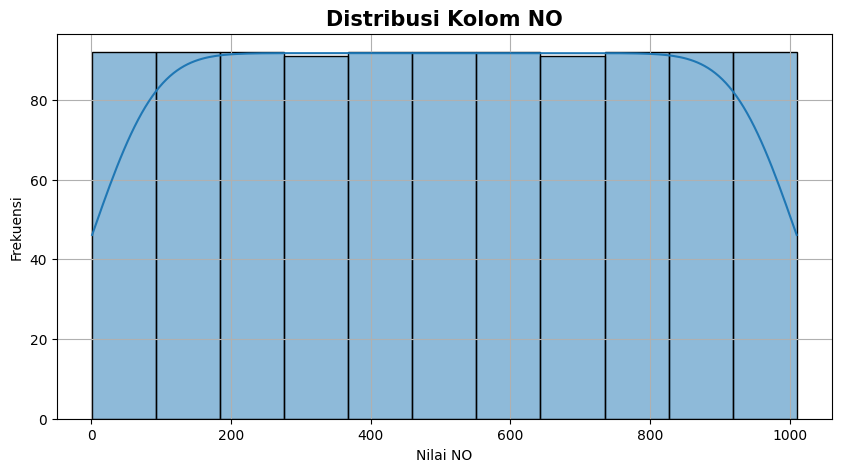

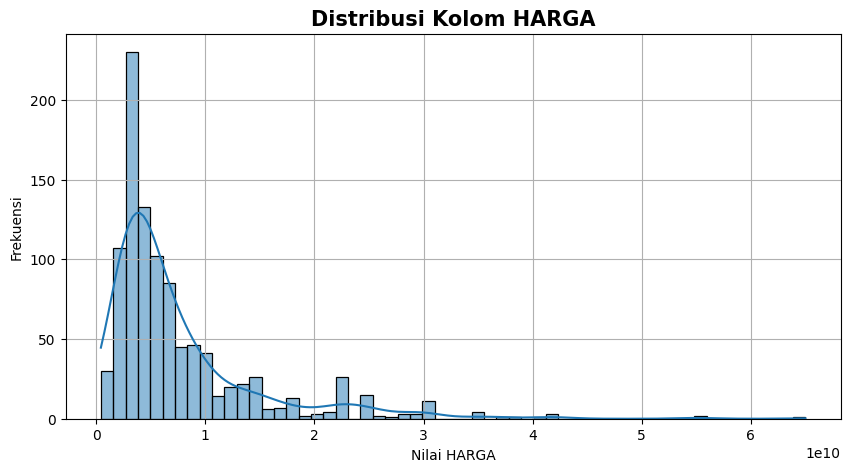

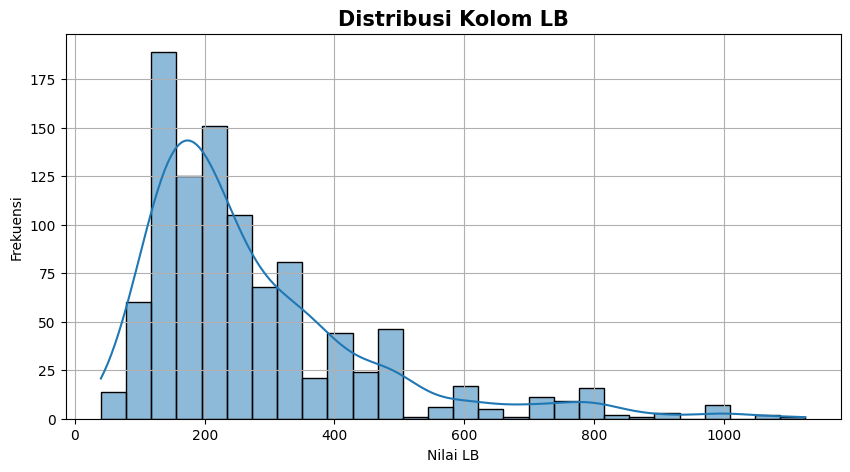

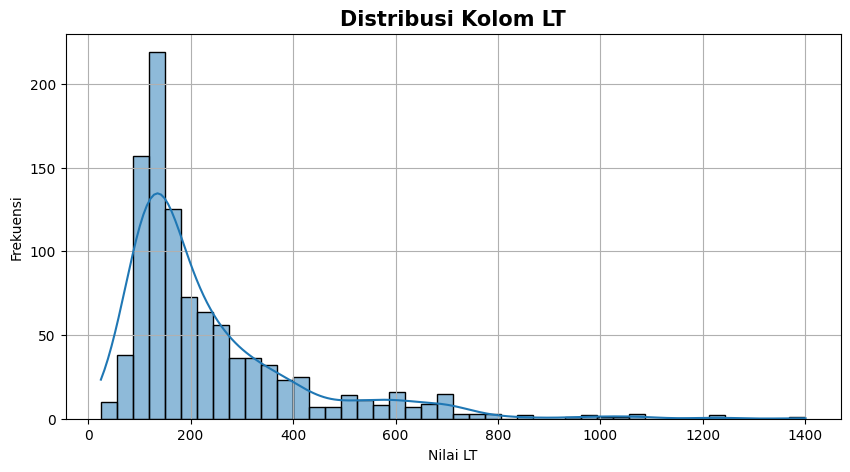

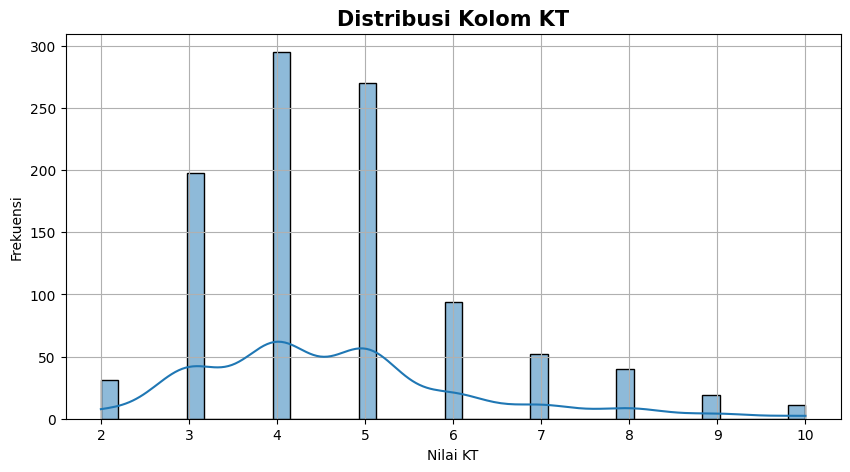

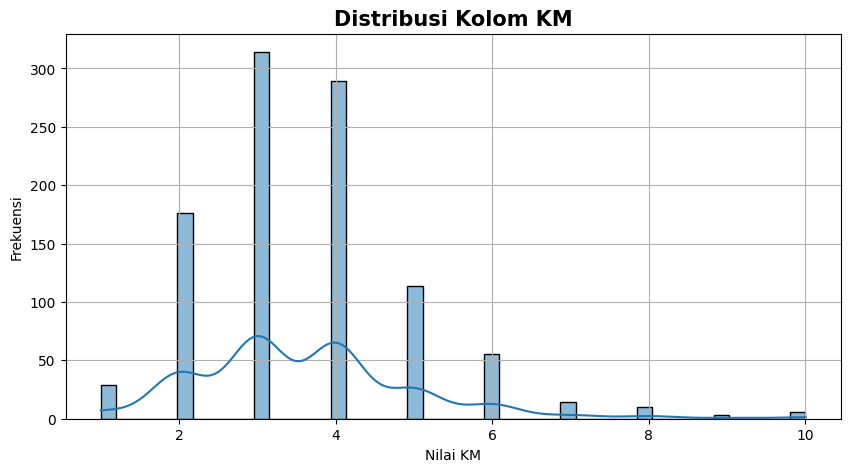

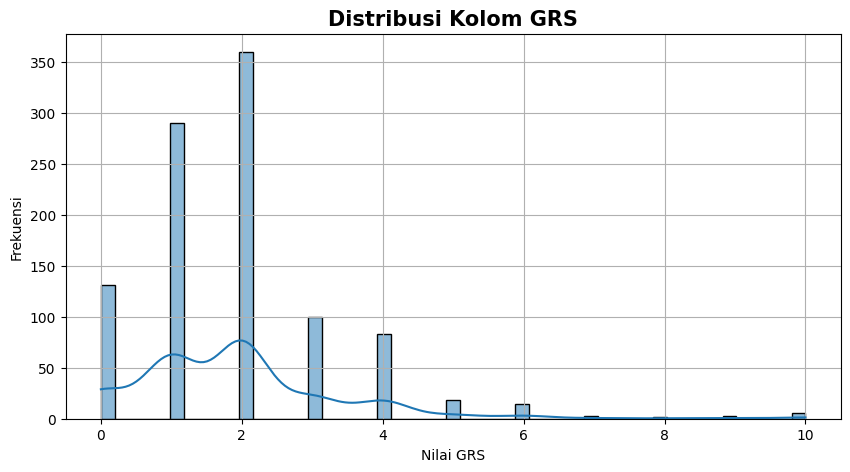

In [14]:
# Dapetin kolom numerik
col_num = df.select_dtypes(include='number').columns
print(f"Kolom Numerik Berupa :  {col_num}")

# Visualisasi distribusi menggunakan histogram
print("\nVisualisasi Distribusi Setiap Fitur:")
for column in col_num:
  plt.figure(figsize=(10, 5))
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Distribusi Kolom {column}', fontweight='bold', fontsize=15)
  plt.xlabel(f'Nilai {column}')
  plt.ylabel(f'Frekuensi')
  plt.grid(True)
